## <center>Adrian Kowalski - 54151 - ININ6_FD2</center>
### <center>Laboratorium - Sztuczna Inteligencja</center>

Imports:

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

<b>Zadanie 8</b>
Tablica NumPy reprezentuje wyniki testów przeprowadzonych w grupie INIS6_PR2 
gdzie każdy wiersz zawiera wyniki jednego studenta.
Oblicz procentowe udział studentów, ktorzy zaliczyli test (osiągneli wynik powyżej wymaganego progu - min zaliczenia to 60% - czyli ocena 3. Zarkes dla 4 oraz 5 wymyślacie sami) 
oraz oblicz średnią wyniku dla każdego testu. (Oceny "połowiczne" też są mile widziane 3,5   4,5)

<i>Komentarz</i>

Na początku wygenerowałem losową tablicę z wynikami studentów,
później słownik ze skalą ocen.
Zakładając, że tablica z wynikami będzie się zmieniać, albo docelowo 
w przyszłości byłaby podawana przez użytkownika, potrzebuję 
znać jej wymiary, w tym celu użyłem metody "shape", która jest wbudowaną metodą w tablice numpy.

Kod "results >= 60" zwraca tablicę w takim samym kształcie i z takimi samymi wymiarami jak tablica "results" tylko zamiast wartości liczbowych otrzymałem wartość True (1) dla wyników równych lub większych 60 i False (0) dla wyników poniżej 60.
Korzystając z metody sum z numpy, otrzymałem informację ile osób zdało dany test, po czym mogłem to przeliczyć na wartość procentową.

Do wyliczenia średniej wartości dla każdego z testów wykorzystałem metodę mean z numpy z dodatkowym argumentem axis = 0 aby działać wzdłuż kolumn

Z samej treści zadania nie wynikało do czego mamy użyć reszty ocen ze skali którą wymyślimy więc dodałem
dodatkowy kod, który przelicza wyniki na oceny z każdego testu dla każdego studenta.

In [2]:
results = numpy.random.randint(0, 100, size=(5, 4))

scale = {60: 3, 70: 3.5, 75: 4, 85: 4.5, 90: 5}

rows, cols = results.shape

pass_percentage = numpy.sum(results >= 60, axis=0) / rows * 100
average = numpy.mean(results, axis=0)

def get_grade(score):
    final_grade = 2
    for min_score, grade in scale.items():
        if score >= min_score:
            final_grade = grade
    return final_grade
          
            
grades = [[get_grade(results[j][i]) for i in range(cols)] for j in range(rows)]

print('procent zdanych: ', pass_percentage)
print('średnia: ', average)
print('oceny: ', grades)

procent zdanych:  [40. 20. 40. 40.]
średnia:  [38.2 27.2 43.2 60. ]
oceny:  [[5, 2, 2, 3], [3, 4, 5, 4.5], [2, 2, 2, 2], [2, 2, 3.5, 2], [2, 2, 2, 2]]


<b>Zadanie 7</b>
Tablica NumPy reprezentuje obraz z w skali szaro-szarej, 
gdzie wartości pikseli są reporezentowane jako liczby całkowite z zakresu od 0 do 255. 
Oblicz min, max i średnią wartość pikseli na obrazie.

<i>Komentarz</i>

Na początku generuje losową tablicę, która reprezentuje obraz.
Poźniej korzystając w budowanych metod w numpy wyliczana jest minimalna,maksymalna i średnia wartość pikseli

Interpretacja tych danych pozwala nam na ocenę ogólnego zakresu jasności obrazu
oraz wskazanie jaką wartość przyjmuje najciemniejszy i najjaśniejszy punkt na obrazie

In [3]:
image = numpy.random.randint(0, 255, size=(20, 20))

min_value = numpy.min(image)
max_value = numpy.max(image)
average_value = numpy.mean(image)

print('Minimalna wartość pikseli: ', min_value)
print('Maksymalna wartość pikseli: ', max_value)
print('Średnia wartość pikseli: ', average_value)

Minimalna wartość pikseli:  0
Maksymalna wartość pikseli:  253
Średnia wartość pikseli:  125.435


<b>Zadanie 6</b>
2 tablice NumPy o takim samym kształcie  np. a i b , 
reprezentują dwie macierze 3x3. 
Oblicz sumę, iloraz, iloczyn, różnicę tych dwóch macierzy.

<i>Komentarz</i>

Standardowo, na początku generujemy dwie losowe macierze o takich samych wymiarach (3x3)
Dodawanie i odejmowanie macierzy można wykonać za pomocą zwykłych operatorów + i -

Sprawa komplikuje się w przypadku mnożenia, gdyż operator * zwraca nam macierz powstałą w wyniku mnożenia przez siebie odopwiadających elemnentów z obu macierzy. Analogicznie operator /. 

Powyżej opisane podejście nie jest do końca zgodne ze sztuką matematyczną.
Wynik mnożenia macierzowego możemy jednak uzyskać korzystając z metody numpy - matmul.
Z uzyskaniem ilorazu może być już większy problem, gdyż nie istnieje coś takiego jak
dzielenie macierzowe. Po zastanowieniu się spojrzałem na ten problem z innej strony,
gdyż operacja dzielenia może być przedstawiona jako mnożenie przez odwrotność, a macierz odwrotną można w łatwy sposób uzyskać za pomocą wbudowanej metody w numpy (numpy.linalg.inv). Stąd moja druga propozycja na uzyskanie ilorazu w postaci mnożenia macierzy A przez odwrotność macierzy B.


In [4]:
a = numpy.random.randint(0, 10, size=(3, 3))
b = numpy.random.randint(1, 10, size=(3, 3))

matrices_sum = a + b
matrices_difference = a - b

matrices_product = a * b
matrices_quotient = a / b

matrices_product_math = numpy.matmul(a, b)
matrices_quotient_math = numpy.matmul(a, numpy.linalg.inv(b))


print('suma: ', matrices_sum)
print('różnica: ', matrices_difference)

print('iloczyn elementów: ', matrices_product)
print('iloraz elementów: ', matrices_quotient)

print('iloczyn: ', matrices_product_math)
print('iloraz: ', matrices_quotient_math)

suma:  [[16  9  6]
 [11 10 18]
 [ 3 14  7]]
różnica:  [[ 2  1  2]
 [ 3 -6  0]
 [-1  2  5]]
iloczyn elementów:  [[63 20  8]
 [28 16 81]
 [ 2 48  6]]
iloraz elementów:  [[1.28571429 1.25       2.        ]
 [1.75       0.25       1.        ]
 [0.5        1.33333333 6.        ]]
iloczyn:  [[ 91 100  67]
 [ 75  98  41]
 [ 51 104  80]]
iloraz:  [[ 1.248  0.196 -0.26 ]
 [ 0.888  0.976 -1.56 ]
 [-0.456  0.688  0.72 ]]


<b>Zadanie 5</b>
Badacz naukowy zajmuje się analizą danychh meteorologicznych. (Dane określacie sami)
Otrzymał dane z trzech stacji, które mierzą temperaturę oraz wilgotność powietrza na 3 wysokościach 
0m,
500m,
1000m w ciągu ostatnich 7 dni.

Oblicz średnią temperaturę i wilgotności na poszczególnych wysokościach i przedstaw je w postaci tablicy wielowymiarowej za pomocą biblioteki NumPy oraz Pandas + wykres

<i>Komentarz</i>

Na początek zostały wygenerowane losowe dane, spełniające kryteria (7 dni, 3 stacje pomiarowe), z ograniczonego przedziału tak aby stwarzały wrażenie autentycznych pomiarów. Później za pomocą wbudowanych metod w numpy obliczyłem średnie wartości dla temperatury i wilgotności. 

Utworzyłem tablicę dla wyliczonch średnich dla numpy i utworzono data frame dla pandas.

Następnie utworzyłem wykresy. Jak widać na przykładzie poniższego kodu utworzenie zbliżonych wyglądem wykresów okazało się dużo prostrze z użyciem data frameu z pandas

In [5]:
temperatures_data = numpy.random.randint(18, 21, size=(7, 3))
humidity_data = numpy.random.randint(58, 64, size=(7, 3))
heights = ['0 m', '500 m', '1000 m']

numpy:

[[18.71428571 19.28571429 19.        ]
 [60.71428571 59.71428571 60.14285714]] 



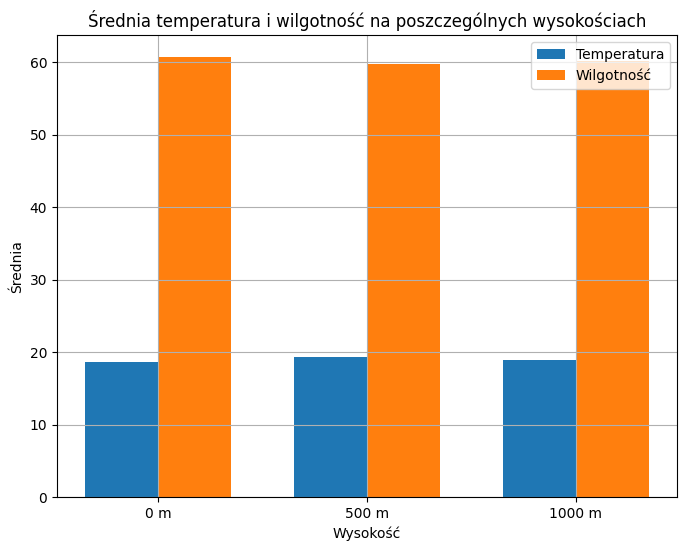

In [6]:
mean_temperatures_numpy = numpy.mean(temperatures_data, axis=0)
mean_humidity_numpy = numpy.mean(humidity_data, axis=0)

numpy_array = numpy.array([mean_temperatures_numpy, mean_humidity_numpy])

print(numpy_array,'\n')

x = numpy.arange(len(mean_temperatures_numpy))

plt.figure(figsize=(8, 6))
width = 0.35

plt.bar(x - width/2, mean_temperatures_numpy, width, label='Temperatura')
plt.bar(x + width/2, mean_humidity_numpy, width, label='Wilgotność')
plt.xlabel('Wysokość')
plt.ylabel('Średnia')
plt.title('Średnia temperatura i wilgotność na poszczególnych wysokościach')
plt.xticks(x, ['0 m', '500 m', '1000 m'])
plt.legend()
plt.grid(True)
plt.show()

pandas:

        Średnia temperatura  Średnia wilgotność
0 m               18.714286           60.714286
500 m             19.285714           59.714286
1000 m            19.000000           60.142857 



<Figure size 800x600 with 0 Axes>

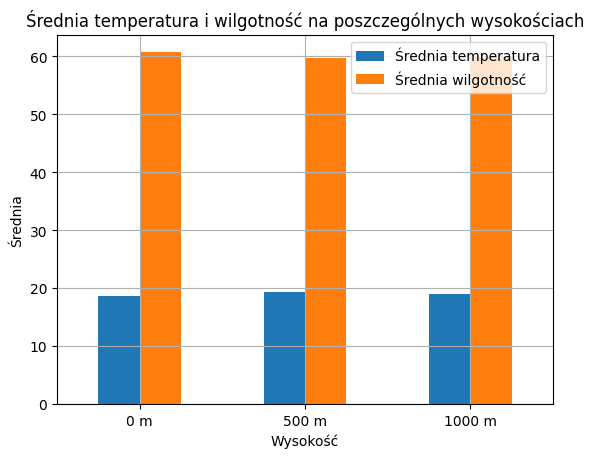

In [7]:
pandas_df = pandas.DataFrame({'Średnia temperatura': numpy.mean(temperatures_data, axis=0),
                             'Średnia wilgotność': numpy.mean(humidity_data, axis=0)},
                            index=heights)
print(pandas_df, '\n')

plt.figure(figsize=(8, 6))
pandas_df.plot(kind='bar', rot=0)
plt.xlabel('Wysokość')
plt.ylabel('Średnia')
plt.title('Średnia temperatura i wilgotność na poszczególnych wysokościach')
plt.legend()
plt.grid(True)
plt.show()

<b>Zadanie 4</b>
Wymyśl zadanie na łączenie danych w Pandas oraz napisz rozwiązanie (tablice jedno wymiarowe, wielowymiarowe)

<i>Komentarz</i>

W wymyślonym zadaniu chodzi o połączenie dwóch zestawów danych. Pierwszy dotyczy sprzedawanych produktów i zawiera ich nazwę oraz ID, drugi dotyczy sprzedaży produktów w różnych regionach i zawiera informacje o ID Produktu, ID regionu, ilości sprzedanych sztuk. Zadanie polega na połączeniu tych danych w jeden kompletny zestaw informacji.


In [8]:
products_data = {'ProductID': [1, 2, 3],
                 'ProductName': ['Product A', 'Product B', 'Product C']}
sales_data = {'ProductID': [1, 2, 3, 1],
              'RegionID': [1, 1, 2, 2],
              'Quantity': [10, 15, 20, 12]}


products_df = pandas.DataFrame(products_data)
sales_df = pandas.DataFrame(sales_data)

merged_df = pandas.merge(products_df, sales_df, on='ProductID')

print(merged_df)

   ProductID ProductName  RegionID  Quantity
0          1   Product A         1        10
1          1   Product A         2        12
2          2   Product B         1        15
3          3   Product C         2        20


<b>Zadanie 3</b>
Stwórz dane w .csv (inny przypadek niż w zadaniu nr. 2)  następnie wykonaj ich analizę z wykorzystaniem Pandas i przedstaw ich wyniki w postaci wykresów

<i>Komentarz</i>

Dostępne są dane dotyczące sprzedaży produktów ze sklepu elektronicznego
Celem analizy w tym zadaniu będzie sprawdzenie który produkt zarobił najwięcej, którego produktu sprzedało się najwięcej
a także sprawdzenie jak wygląda ogólna ilość sprzedaży w czasie.

Pierwszy komórka tworzy plik CSV z danymi do późniejszego odczytu

In [9]:
store_data = {
    'Products': ['Telewizor', 'Smartfon', 'Laptop', 'Kamera', 'Głośniki', 'Monitor', 'Klawiatura', 'Myszka', 'Słuchawki', 'Drukarka', 'Tablet'],
    'Category': ['Elektronika', 'Elektronika', 'Elektronika', 'Fotografia', 'Audio', 'Elektronika', 'Elektronika', 'Elektronika', 'Audio', 'Biuro', 'Elektronika'],
    'Price': [744, 657, 692, 223, 705, 400, 150, 50, 120, 250, 300],
    'Quantity': [8, 8, 1, 5, 5, 3, 5, 10, 4, 2, 3],
    'Dates': ['2023-01-01 00:00:00', '2023-04-02 00:00:00', '2023-07-02 00:00:00', '2023-10-01 00:00:00', '2023-12-31 00:00:00', '2024-02-15', '2024-03-01', '2024-03-15', '2024-04-01', '2024-05-15', '2024-06-30']
}

store_df = pandas.DataFrame(store_data)

store_df.to_csv('store_data.csv', index=False)

Największy przychód:  Telewizor  -  5952 zł.
Najwięcej sprzedanych:  Myszka  -  10 szt.


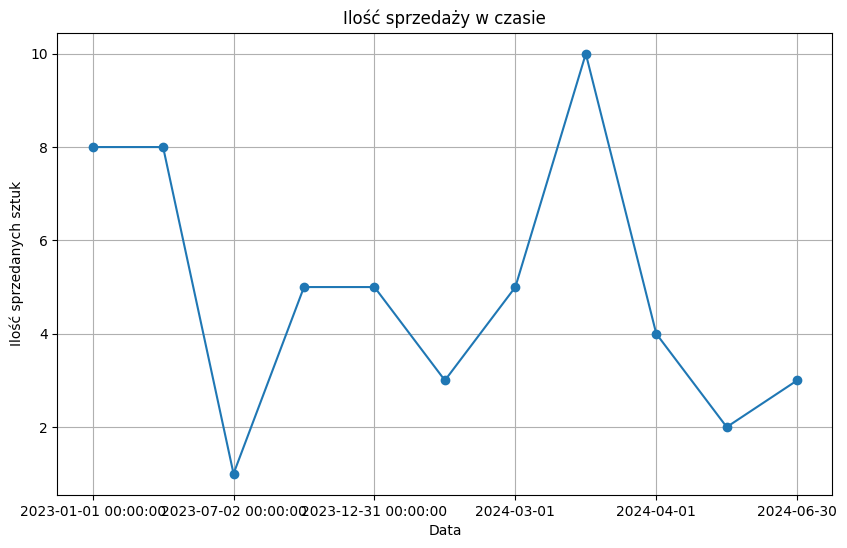

      Products     Category  Price  Quantity                Dates  Revenue
0    Telewizor  Elektronika    744         8  2023-01-01 00:00:00     5952
1     Smartfon  Elektronika    657         8  2023-04-02 00:00:00     5256
2       Laptop  Elektronika    692         1  2023-07-02 00:00:00      692
3       Kamera   Fotografia    223         5  2023-10-01 00:00:00     1115
4     Głośniki        Audio    705         5  2023-12-31 00:00:00     3525
5      Monitor  Elektronika    400         3           2024-02-15     1200
6   Klawiatura  Elektronika    150         5           2024-03-01      750
7       Myszka  Elektronika     50        10           2024-03-15      500
8    Słuchawki        Audio    120         4           2024-04-01      480
9     Drukarka        Biuro    250         2           2024-05-15      500
10      Tablet  Elektronika    300         3           2024-06-30      900


In [10]:
df = pandas.read_csv('store_data.csv')

df['Revenue'] = df['Price'] * df['Quantity']

max_revenue_product = df.loc[df['Revenue'].idxmax(), 'Products']
max_revenue = df['Revenue'].max()
print('Największy przychód: ', max_revenue_product, ' - ', max_revenue, 'zł.')

max_quantity_product = df.loc[df['Quantity'].idxmax(), 'Products']
max_quantity = df['Quantity'].max()
print('Najwięcej sprzedanych: ', max_quantity_product, ' - ', max_quantity, 'szt.')

sales_by_date = df.groupby('Dates')['Quantity'].sum()

plt.figure(figsize=(10, 6))
sales_by_date.plot(kind='line', marker='o')
plt.xlabel('Data')
plt.ylabel('Ilość sprzedanych sztuk')
plt.title('Ilość sprzedaży w czasie')
plt.grid(True)
plt.show()

print(df)

<b>Zadanie 2</b>
Stwórz dane w tablicy, wykonaj ich analizę z wykorzystaniem Pandas i przedstaw ich wyniki w postaci wykresów.

<i>Komentarz</i>

W tym zadaniu w sposób kontrolowany wygenerowałem losowe dane dla głębokości na której znajduje się nurek podczas wycieczki do zatopionego statku. Głównym założeniem tych danych było aby nurek na początku schodził pod wodę, a na koniec stopniowo się wynurzał. W trakcie zwiedzania samego wraku statku zmieniał swoją głębokość tylko w określonym przedziale, ale może robić to dość losowo, bo nie wiadmo w sumie co przykuje jego uwagę pod wodą.

Wygenerowane dane umieściłem na wykresach: histogramie, wykresie pudełkowym, wykresie gęstości i wykresie puntkowym.

Z histogramu mogę wyciągnąć informację na jakiej głębokości nurek znajdował się najczęściej.
W moim przypadku była to wartość 20, co można interpretować, że 20 metrów pod poziomem moża znajduje się największa, lub najbardziej interesująca część statku, przykładowo sala balowa, albo jakiś długi korytarz pod pokładam który służył do przemieszczania sie pomiędzy różnymi częściami statku. 

Wykres pudełkowy również przedstawia rozkład głębokości nurkowania ale bardziej graficznie, łatwiej na nim zobaczyć przykładowo na jakiej głębokości jest zanużony większość wraku statku.

Na wykresie gęstości dużo łatwiej na pierwszy rzut oka zobaczyć to samo co na histogramie.

Wykres punktowy pozwala nam dokładniej prześledzić trasę nurka

In [11]:
depth_data = numpy.concatenate([
    numpy.cumsum([0] + [numpy.random.uniform(2, 5) for _ in range(6)]),
    numpy.random.uniform(13, 27, size=(40,)),
    numpy.cumsum([15] + [-numpy.random.uniform(2, 5) for _ in range(4)]),  
])

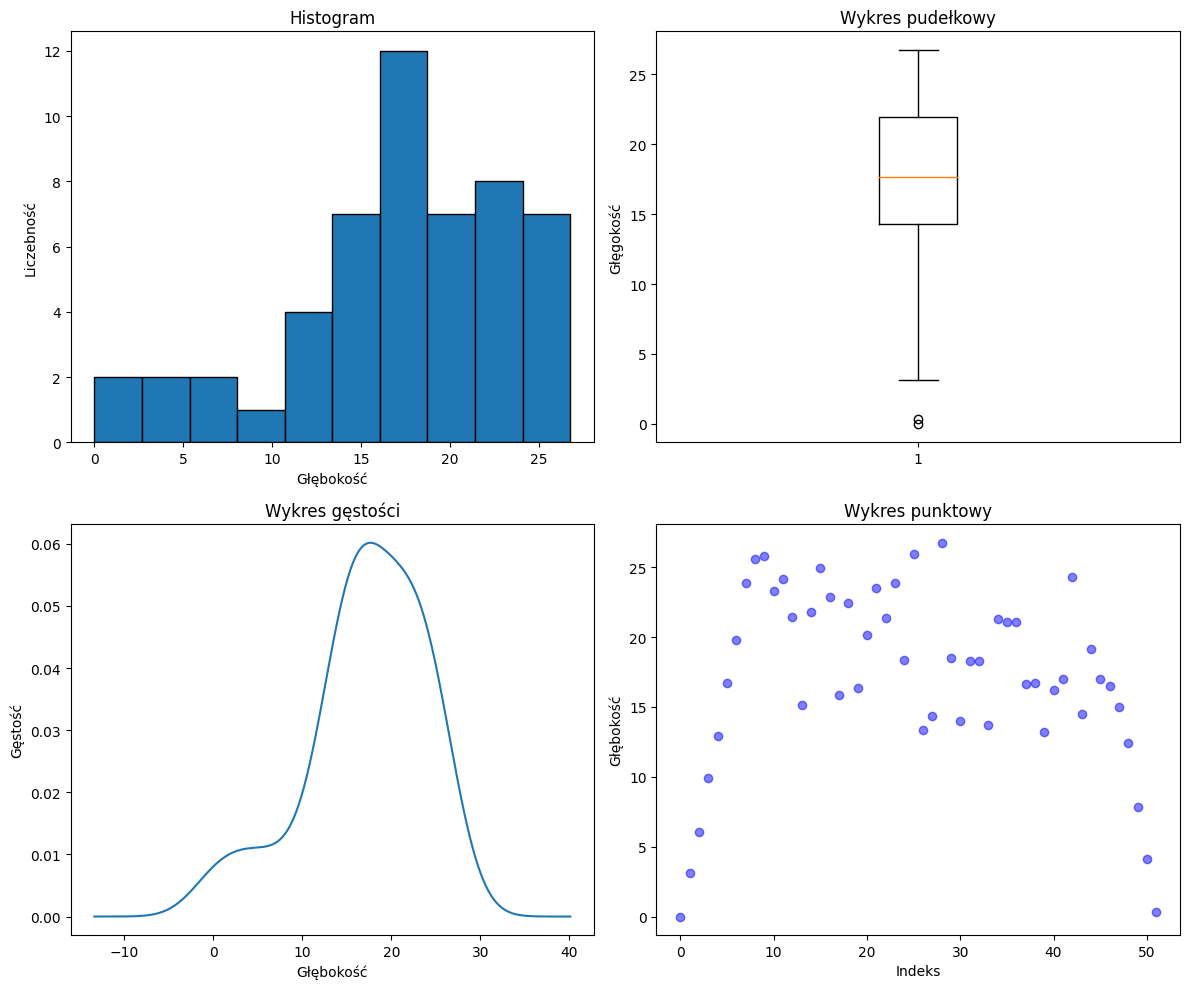

In [12]:
data_frame = pandas.DataFrame(depth_data, columns=['Głębokość'])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(data_frame['Głębokość'], bins=10, edgecolor='black')
axs[0, 0].set_xlabel('Głębokość')
axs[0, 0].set_ylabel('Liczebność')
axs[0, 0].set_title('Histogram')

axs[0, 1].boxplot(data_frame['Głębokość'])
axs[0, 1].set_ylabel('Głęgokość')
axs[0, 1].set_title('Wykres pudełkowy')

data_frame['Głębokość'].plot.kde(ax=axs[1, 0])
axs[1, 0].set_xlabel('Głębokość')
axs[1, 0].set_ylabel('Gęstość')
axs[1, 0].set_title('Wykres gęstości')

axs[1, 1].plot(data_frame['Głębokość'], 'bo', alpha=0.5)
axs[1, 1].set_xlabel('Indeks')
axs[1, 1].set_ylabel('Głębokość')
axs[1, 1].set_title('Wykres punktowy')

plt.tight_layout()
plt.show()

<b>Zadanie 1</b>
Napisz algorytm do mnożenia macierzy z wykorzystaniem NumPy
- jednowymiarowa
- dwuwymiarowa
- wielowymiarowa
Po trzy przykłady

<i>Komentarz</i>

Napisałem dwie funkcje, jedną do mnożenia wektorów, drugą do mnożenia macierzy dwuwymiarowych.

Funkcja do mnożenia macierzy jednowymiarowych jest stosunkowo prosta, używa wbudowanej funkcji zip() aby jednocześnie iterować po elementach obu tablic, mnożyć ze sobą ich elementy, a później wszystko wszystko jest sumowane przy użyciu funkcji sum().
Warto tu zwrócić uwagę na metodę flatten(). Jako że numpy domyślnie zawsze generuje nam macierz, to defacto nasz wektor prezentuje się tak: [[x1, x2, x3]], co powodowało to, że zip() iterował po wierszach tej zewnętrznej macierzy, a nie po elementach wektora. Metoda flatten sprowadziła nam ten wektor do postaci: [x1, x2, x3], co pozwoliło poprawnie wykonać resztę operacji i otrzymać prawidłowy wynik.

Funkcja do mnożenia macierzy dwuwymiarowych jest nieco bardziej skomplikowana, ale na swój pythonowy sposób dużo piękniejsza.
Po pierwsze bierzemy każdy wiersz z macierzy A, następnie korzystająć ponownie z funkcji zip(), tym razem dodając operator rozwinięcia listy * , otrzymujemy macierz o takich samych wymiarach, ale kolumnami zamienionymi na wiersze. Z tej macierzy bierzemy każdy kolumnę (tzn. bierzemy wiersz, ale dzięki wcześniejszej zamianie, są to kolumny oryginalnej macierzy) i później sprowadza się to w sumie do mnożenia wektorów, czyli analogicznie iterujemy po elementach obu wektorów, mnożymy je ze sobą i sumujemy

In [13]:
A_2d = numpy.random.randint(1, 15, size=(3, 3))
B_2d = numpy.random.randint(1, 15, size=(3, 3))
C_2d = numpy.random.randint(1, 15, size=(3, 3))

A_1d = numpy.random.randint(1, 15, size=(1, 3))
B_1d = numpy.random.randint(1, 15, size=(1, 3))
C_1d = numpy.random.randint(1, 15, size=(1, 3))

In [14]:
def multiply1d(A, B):
    return sum(a * b for a, b in zip(A.flatten(), B.flatten()))

def multiply2d(A,  B):
    return [[sum(a * b for a, b in zip(row, column)) for column in zip(*B)] for row in A]

In [15]:
print(multiply1d(A_1d, B_1d))
print(numpy.matmul(A_1d, B_1d.T))
print(multiply1d(A_1d, C_1d))
print(numpy.matmul(A_1d, C_1d.T))
print(multiply1d(B_1d, C_1d))
print(numpy.matmul(B_1d, C_1d.T))
print('===============================')
print(multiply2d(A_2d, B_2d))
print(numpy.matmul(A_2d, B_2d))
print(multiply2d(A_2d, C_2d))
print(numpy.matmul(A_2d, C_2d))
print(multiply2d(B_2d, C_2d))
print(numpy.matmul(B_2d, C_2d))



43
[[43]]
65
[[65]]
83
[[83]]
[[65, 117, 154], [54, 78, 104], [122, 210, 164]]
[[ 65 117 154]
 [ 54  78 104]
 [122 210 164]]
[[242, 102, 120], [194, 90, 100], [294, 102, 164]]
[[242 102 120]
 [194  90 100]
 [294 102 164]]
[[372, 158, 202], [136, 30, 70], [384, 146, 194]]
[[372 158 202]
 [136  30  70]
 [384 146 194]]
